In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
berlin_appartments = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")

In [3]:
berlin_appartments.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


In [4]:
berlin_appartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             764 non-null    object 
 1   Condition          764 non-null    object 
 2   Rooms              764 non-null    float64
 3   Rent               764 non-null    float64
 4   Year_Construction  764 non-null    int64  
 5   Space              764 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 35.9+ KB


In [5]:
berlin_appartments.Region.unique()

array(['Mitte', 'Kreuzberg', 'Köpenick', 'Wilmersdorf', 'Charlottenburg',
       'Friedrichsfelde', 'Tiergarten', 'Prenzlauer', 'Wedding',
       'Neukölln'], dtype=object)

In [6]:
berlin_appartments.Region.nunique()

10

In [7]:
berlin_appartments.Rent.max()

14207.0

In [8]:
berlin_appartments.Rent.min()

271.25

In [9]:
berlin_appartments.shape

(764, 6)

In [10]:
berlin_appartments.Rooms.min()

1.0

In [11]:
berlin_appartments.Space.min()

14.0

**Groupby**

- GroupBy Region - What is on average the most expensive region?
- What is the mean rent for the different amount of rooms?
- What is the mean rent per condition?

In [12]:
berlin_appartments.groupby('Region')['Rent'].mean().reset_index()

,Region,Rent
0,Charlottenburg,1753.452532
1,Friedrichsfelde,1043.871731
2,Kreuzberg,2049.138085
3,Köpenick,1125.475818
4,Mitte,2408.725033
5,Neukölln,1188.114915
6,Prenzlauer,1996.962264
7,Tiergarten,1914.824795
8,Wedding,847.138571
9,Wilmersdorf,1748.646226


In [13]:
px.bar(berlin_appartments, x = 'Region', y = 'Rent', color = 'Region', template = 'plotly_white', title = 'On average, the most expensive region')

<Axes: xlabel='Rent', ylabel='Region'>

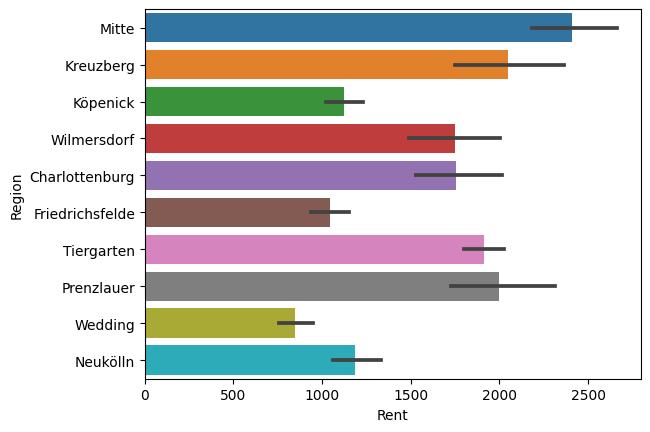

In [14]:
sns.barplot(berlin_appartments, x = 'Rent', y = 'Region')

In [15]:
berlin_appartments.groupby('Rooms')['Rent'].mean().reset_index()

,Rooms,Rent
0,1.0,833.258318
1,1.5,882.735556
2,2.0,1358.017786
3,2.5,1691.043750
4,3.0,2048.237042
5,3.5,1901.928750
6,4.0,2690.214242
7,4.5,1370.000000
8,5.0,4359.084211
9,6.0,3739.460000


In [16]:
px.bar(berlin_appartments, x = 'Rooms', y = 'Rent', template = 'plotly_white')

<Axes: xlabel='Rooms', ylabel='Rent'>

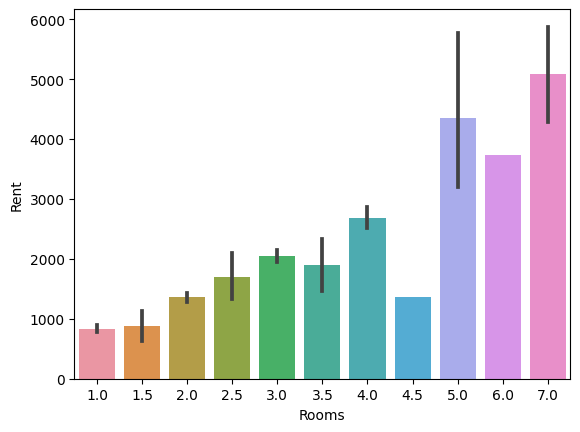

In [17]:
sns.barplot(berlin_appartments, x = 'Rooms', y = 'Rent')

In [18]:
berlin_appartments.groupby('Condition')['Rent'].mean().reset_index()

,Condition,Rent
0,first_time_use,1866.564222
1,first_time_use_after_refurbishment,1925.351944
2,fully_renovated,1778.308571
3,mint_condition,2122.196154
4,modernized,1185.705172
5,need_of_renovation,612.290000
6,no_information,1544.274955
7,refurbished,2177.256500
8,well_kept,1217.096979


In [19]:
px.bar(berlin_appartments, x = 'Rent', y = 'Condition', template= 'plotly_white')

<Axes: xlabel='Rent', ylabel='Condition'>

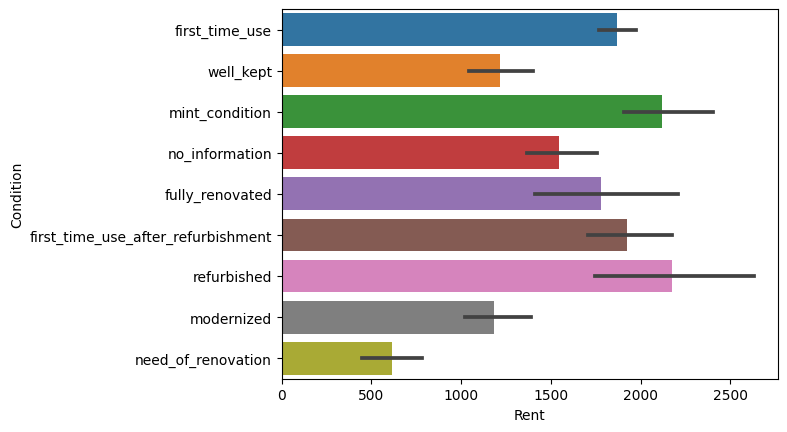

In [20]:
sns.barplot(berlin_appartments, x = 'Rent', y = 'Condition')

In [21]:
berlin_appartments.groupby('Region').agg({'Rent':['mean','min','max']}).reset_index()

Region         Rent                  
                           mean     min       max
0   Charlottenburg  1753.452532  478.52   9774.00
1  Friedrichsfelde  1043.871731  280.74   2138.68
2        Kreuzberg  2049.138085  435.74   6450.00
3         Köpenick  1125.475818  558.06   2159.20
4            Mitte  2408.725033  398.00  14207.00
5         Neukölln  1188.114915  379.95   2295.00
6       Prenzlauer  1996.962264  475.00   5930.00
7       Tiergarten  1914.824795  271.25   4945.00
8          Wedding   847.138571  352.95   1949.26
9      Wilmersdorf  1748.646226  404.39   5876.35

In [22]:
berlin_appartments.groupby('Region').agg({'Rent':['mean','min','max'], 'Space':['mean','min','max']}).reset_index()

Region         Rent                        Space               
                           mean     min       max       mean    min     max
0   Charlottenburg  1753.452532  478.52   9774.00  88.083038  23.62  274.00
1  Friedrichsfelde  1043.871731  280.74   2138.68  66.145000  25.68  118.44
2        Kreuzberg  2049.138085  435.74   6450.00  92.258723  20.00  236.00
3         Köpenick  1125.475818  558.06   2159.20  74.279273  28.40  128.00
4            Mitte  2408.725033  398.00  14207.00  96.235556  18.00  413.91
5         Neukölln  1188.114915  379.95   2295.00  69.849831  14.00  137.31
6       Prenzlauer  1996.962264  475.00   5930.00  95.832264  18.00  324.00
7       Tiergarten  1914.824795  271.25   4945.00  90.228304  24.00  240.00
8          Wedding   847.138571  352.95   1949.26  46.928571  19.22  128.81
9      Wilmersdorf  1748.646226  404.39   5876.35  85.536604  26.90  300.00

In [23]:
berlin_appartments.loc[(berlin_appartments['Space']<20) & (berlin_appartments['Rent']<=450)]

,Region,Condition,Rooms,Rent,Year_Construction,Space
84,Neukölln,well_kept,1.0,450.0,1910,14.0
607,Mitte,mint_condition,1.0,398.0,2017,18.0


In [24]:
berlin_appartments.query('Space <20 & Rent<=450')

,Region,Condition,Rooms,Rent,Year_Construction,Space
84,Neukölln,well_kept,1.0,450.0,1910,14.0
607,Mitte,mint_condition,1.0,398.0,2017,18.0


In [25]:
berlin_appartments.query("Space < 20 & Condition == 'well_kept'")

,Region,Condition,Rooms,Rent,Year_Construction,Space
84,Neukölln,well_kept,1.0,450.0,1910,14.0


In [26]:
berlin_appartments.loc[np.where((berlin_appartments['Rent']<450) & (berlin_appartments['Space']<20) & (berlin_appartments['Year_Construction']>2000))]

,Region,Condition,Rooms,Rent,Year_Construction,Space
607,Mitte,mint_condition,1.0,398.0,2017,18.0


In [27]:
# Which region has the best price per square meter?

berlin_appartments['Rent_per_m2'] = berlin_appartments.Rent / berlin_appartments.Space

In [28]:
berlin_appartments.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,Rent_per_m2
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.687713
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.913740
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.709126
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.691786
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.739209


In [29]:
berlin_appartments.groupby('Region').agg({'Rent_per_m2':['min', 'max','mean']}).reset_index()

Region Rent_per_m2                      
                           min        max       mean
0   Charlottenburg   10.019263  41.913633  21.394455
1  Friedrichsfelde    7.829252  26.869159  16.094004
2        Kreuzberg   11.346000  40.913740  23.333198
3         Köpenick   10.066225  31.936813  15.630360
4            Mitte   15.120052  70.952381  25.966819
5         Neukölln    8.837969  34.500000  17.347237
6       Prenzlauer   10.002556  38.571429  21.957957
7       Tiergarten    8.696825  35.678571  21.461178
8          Wedding    7.950653  38.682927  22.811979
9      Wilmersdorf   10.691786  38.709677  21.474912

In [30]:
berlin_appartments.groupby('Region').agg({'Rent_per_m2':'mean'}).reset_index().sort_values(by = 'Rent_per_m2')

,Region,Rent_per_m2
3,Köpenick,15.630360
1,Friedrichsfelde,16.094004
5,Neukölln,17.347237
0,Charlottenburg,21.394455
7,Tiergarten,21.461178
9,Wilmersdorf,21.474912
6,Prenzlauer,21.957957
8,Wedding,22.811979
2,Kreuzberg,23.333198
4,Mitte,25.966819


In [31]:
berlin_appartments.groupby('Region').agg({'Rent_per_m2':'mean'}).reset_index().sort_values('Rent_per_m2', ascending=True)

,Region,Rent_per_m2
3,Köpenick,15.630360
1,Friedrichsfelde,16.094004
5,Neukölln,17.347237
0,Charlottenburg,21.394455
7,Tiergarten,21.461178
9,Wilmersdorf,21.474912
6,Prenzlauer,21.957957
8,Wedding,22.811979
2,Kreuzberg,23.333198
4,Mitte,25.966819


In [32]:
berlin_appartments.groupby('Region').agg({'Rent_per_m2':'mean'})\
            .reset_index().sort_values('Rent_per_m2', ascending=True)

,Region,Rent_per_m2
3,Köpenick,15.630360
1,Friedrichsfelde,16.094004
5,Neukölln,17.347237
0,Charlottenburg,21.394455
7,Tiergarten,21.461178
9,Wilmersdorf,21.474912
6,Prenzlauer,21.957957
8,Wedding,22.811979
2,Kreuzberg,23.333198
4,Mitte,25.966819


In [33]:
berlin_appartments.assign(Space_rent = lambda record: record['Rent']/record['Space'])\
              .groupby('Region').agg({'Space_rent':'min'})\
              .sort_values('Space_rent', ascending=False)\
              .reset_index()

,Region,Space_rent
0,Mitte,15.120052
1,Kreuzberg,11.346000
2,Wilmersdorf,10.691786
3,Köpenick,10.066225
4,Charlottenburg,10.019263
5,Prenzlauer,10.002556
6,Neukölln,8.837969
7,Tiergarten,8.696825
8,Wedding,7.950653
9,Friedrichsfelde,7.829252


In [34]:
berlin_appartments.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,Rent_per_m2
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.687713
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.913740
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.709126
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.691786
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.739209


In [35]:
# The cheapest square meter price?

berlin_appartments.Rent_per_m2.min()

7.829251700680273

In [36]:
# Which region has on average the oldest buildings?

berlin_appartments.groupby('Region').agg({'Year_Construction':'min'}).reset_index().sort_values('Year_Construction', ascending=True)

,Region,Year_Construction
4,Mitte,1864
2,Kreuzberg,1867
3,Köpenick,1870
6,Prenzlauer,1873
7,Tiergarten,1885
5,Neukölln,1887
0,Charlottenburg,1889
8,Wedding,1890
9,Wilmersdorf,1890
1,Friedrichsfelde,1930


In [37]:
#Which region has the best "in shape" flats to offer?
#Does the shape have an influence on the price per square meter?


berlin_appartments.loc[berlin_appartments['Condition'] == 'well_kept']


,Region,Condition,Rooms,Rent,Year_Construction,Space,Rent_per_m2
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.709126
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.691786
5,Köpenick,well_kept,2.0,840.00,1997,73.51,11.427017
7,Charlottenburg,well_kept,2.0,730.73,1900,72.61,10.063765
8,Friedrichsfelde,well_kept,2.0,561.93,1971,62.40,9.005288
...,...,...,...,...,...,...,...
732,Prenzlauer,well_kept,2.0,1489.00,1901,73.41,20.283340
735,Mitte,well_kept,2.0,1350.00,2014,68.00,19.852941
736,Mitte,well_kept,3.0,3500.00,2009,165.00,21.212121
757,Tiergarten,well_kept,4.0,1970.00,1900,127.00,15.511811


In [112]:
#Which region has the best "in shape" flats to offer?
#defining best in shape flats in terms of more that one Condition

best_shape = ['first_time_use', 'well_kept', 'mint_condition', 'fully_renovated' 'modernized' ]

best_shape_flats = berlin_appartments.loc[berlin_appartments['Condition'].isin(best_shape)].groupby('Region')\
                  .agg({'Condition':'count'}).sort_values('Condition', ascending=False)\
                  .rename(columns={'Condition':'No_best_shape_flats'}).reset_index()

In [115]:
best_shape_flats

,Region,No_best_shape_flats
0,Tiergarten,127
1,Mitte,98
2,Charlottenburg,48
3,Köpenick,41
4,Friedrichsfelde,37
5,Neukölln,36
6,Wilmersdorf,36
7,Kreuzberg,32
8,Prenzlauer,28
9,Wedding,26


In [118]:
#visual with plotly express
px.bar(best_shape_flats, x = 'Region', y = 'No_best_shape_flats', template='plotly_white',color='Region')

<Axes: xlabel='No_best_shape_flats', ylabel='Region'>

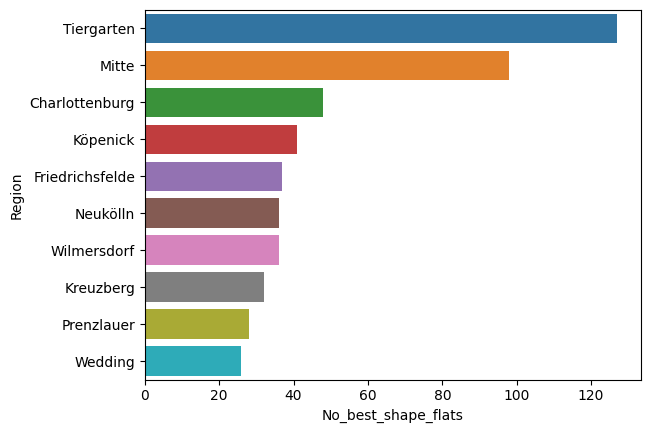

In [122]:
#visual with seaborn
sns.barplot(best_shape_flats, x = 'No_best_shape_flats', y = 'Region')

In [38]:

berlin_appartments.loc[berlin_appartments['Condition'] == 'well_kept'].groupby('Region')\
                  .agg({'Condition':'count'}).sort_values('Condition', ascending=False)\
                  .rename(columns={'Condition':'No_best_shape_house'}).reset_index()

,Region,No_best_shape_house
0,Köpenick,20
1,Neukölln,13
2,Tiergarten,13
3,Charlottenburg,12
4,Wilmersdorf,11
5,Friedrichsfelde,7
6,Mitte,6
7,Prenzlauer,5
8,Wedding,5
9,Kreuzberg,4


In [100]:
berlin_appartments.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,Rent_per_m2
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.687713
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.913740
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.709126
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.691786
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.739209


In [41]:
berlin_appartments.Condition.unique()

array(['first_time_use', 'well_kept', 'mint_condition', 'no_information',
       'fully_renovated', 'first_time_use_after_refurbishment',
       'refurbished', 'modernized', 'need_of_renovation'], dtype=object)

In [42]:
# Does the shape have an influence on the price per square meter?

berlin_appartments.groupby('Condition').agg({'Rent_per_m2':['min','max','mean']}).reset_index()

Condition Rent_per_m2                      
                                              min        max       mean
0                      first_time_use   13.516536  48.963415  22.966016
1  first_time_use_after_refurbishment   12.501340  28.285714  19.334931
2                     fully_renovated   10.793858  33.514872  19.207692
3                      mint_condition   12.607988  70.952381  25.134925
4                          modernized   10.066225  23.750000  15.952482
5                  need_of_renovation    8.827105  12.047500  11.073803
6                      no_information    7.829252  35.671533  19.742599
7                         refurbished   15.261959  45.000000  26.445485
8                           well_kept    8.837969  35.441013  15.521736

**Plot**

Exercise

- Explore the distribution of the rent
- What is the relationship between the construction year and the rent?

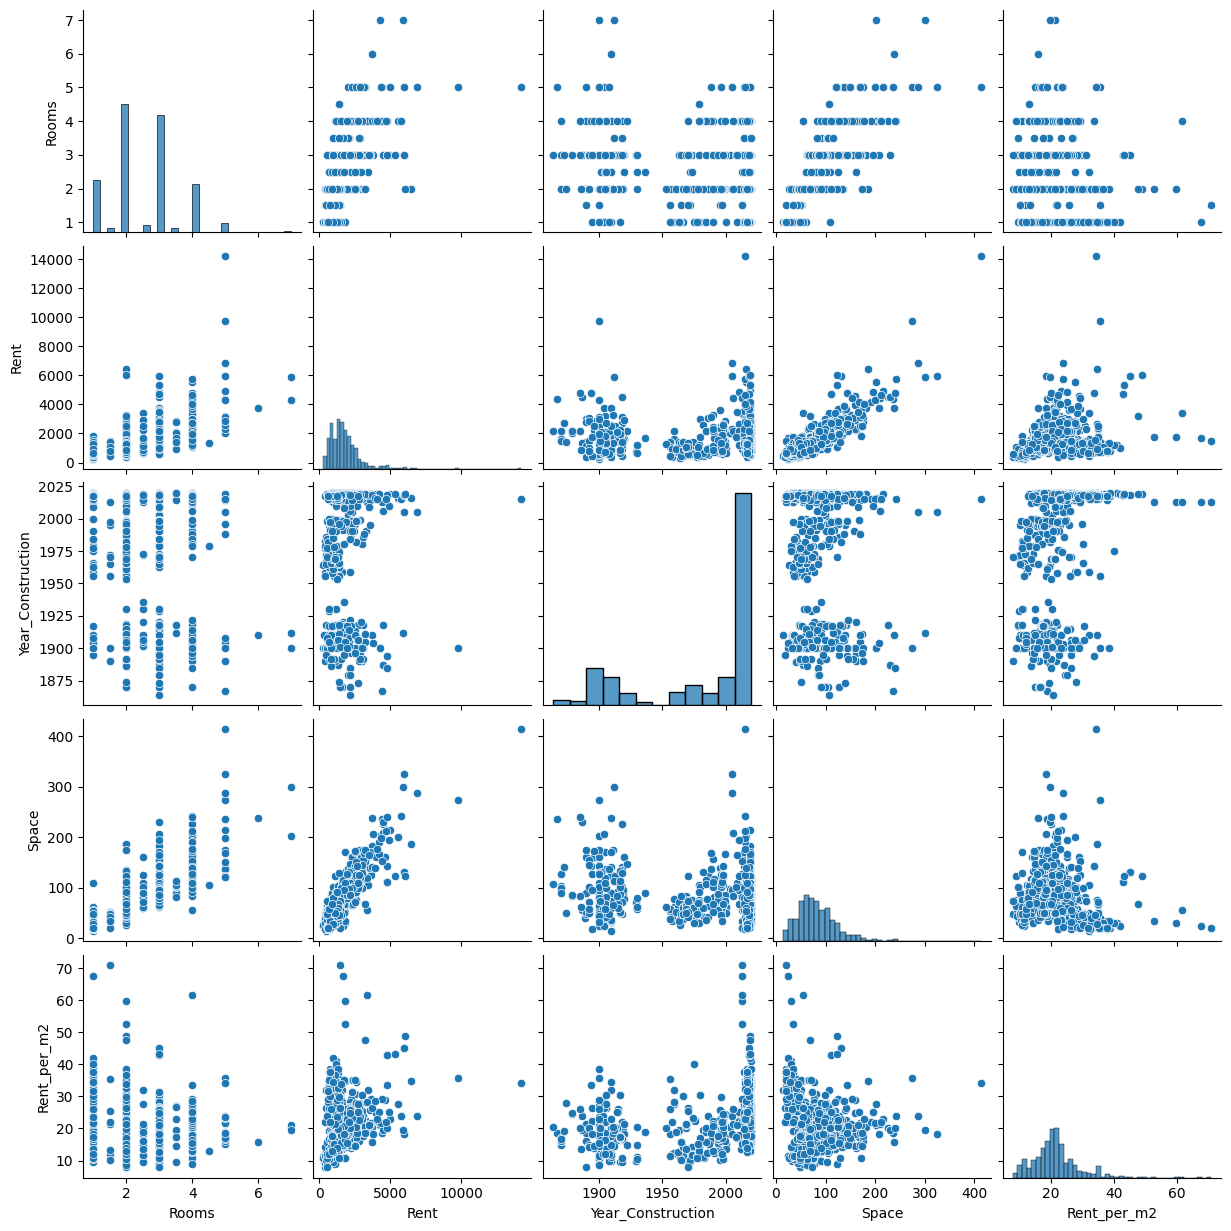

In [51]:
sns.pairplot(berlin_appartments)

In [71]:
berlin_appartments.Rent.describe()

count      764.000000
mean      1768.560942
std       1118.263961
min        271.250000
25%       1039.500000
50%       1565.480000
75%       2170.000000
max      14207.000000
Name: Rent, dtype: float64

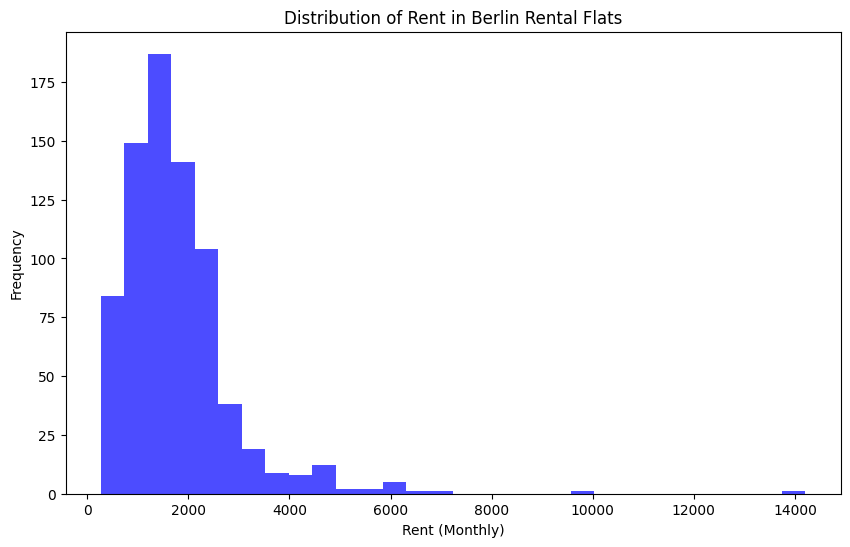

In [72]:
plt.figure(figsize=(10,6))
plt.hist(berlin_appartments['Rent'], bins=30, color = 'blue', alpha=0.7)
plt.xlabel('Rent (Monthly)')
plt.ylabel('Frequency')
plt.title('Distribution of Rent in Berlin Rental Flats')
plt.show()

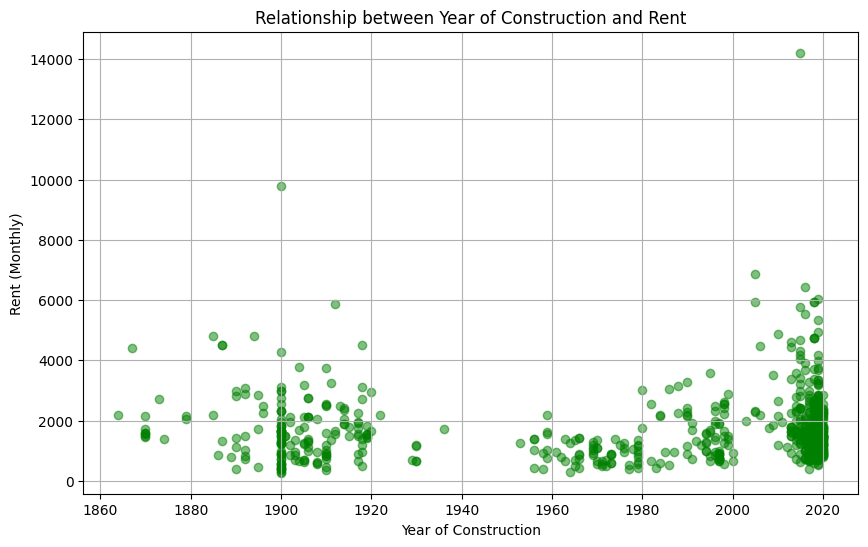

In [89]:
#using matplotlib to show the relationshp between Rent and Year_Construction
plt.figure(figsize=(10,6))
plt.scatter(berlin_appartments['Year_Construction'], berlin_appartments['Rent'], alpha=0.5, color = 'green')
plt.xlabel('Year of Construction')
plt.ylabel('Rent (Monthly)')
plt.title('Relationship between Year of Construction and Rent')
plt.grid(True)
plt.show()


<Axes: xlabel='Year_Construction', ylabel='Rent'>

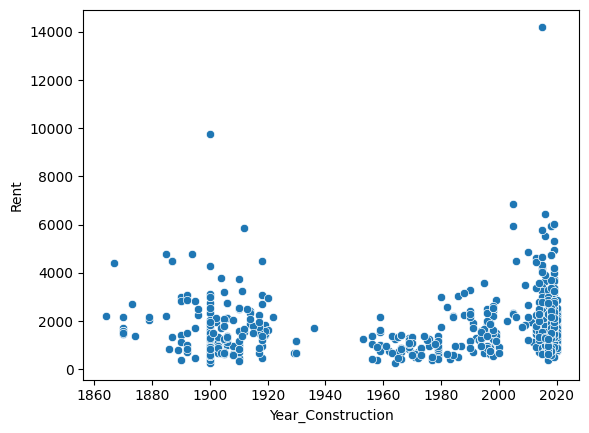

In [69]:
#using seaborn to show the relationshp between Rent and Year_Construction
sns.scatterplot(berlin_appartments, x = 'Year_Construction', y = 'Rent')

In [70]:
berlin_appartments.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,Rent_per_m2
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.687713
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.913740
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.709126
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.691786
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.739209


**Find a good flat!**

My friend Josy is looking for a flat. She is still a student and cannot afford an expensive flat. Are there flats with a rent less than 500€ and more than 25 sqm (Space). She would like to move to Kreuzberg, Wedding, Prenzlauer Berg or Mitte. Any flats available for her? Is there a flat with two rooms and these constraints?

In [101]:
#selecting the region of interest
locations = ['Kreuzberg', 'Wedding', 'Prenzlauer Berg', 'Mitte']

flats = berlin_appartments[(berlin_appartments['Rent'] < 500) & (berlin_appartments['Space']>25) & (berlin_appartments['Region'].isin(locations))]

#checking if there are 2 rooms flats
two_rooms_flats =  flats[flats['Rooms'] == 2]

if not flats.empty:
  print("Available flats with rent lenss that 500 euro, more than 25 sqm, and in location of interest")
  print(flats[['Region', 'Rent', 'Space']])

else:
  print("No flats available that meet the specified criteria.")

if not two_rooms_flats.empty:
  print("\nAvailable flats with two rooms that also meet the criteria:")
  print(two_rooms_flats[['Region', 'Rent', 'Space']])

else:
  print("No two-rooms flats available that meet the specific criteria.")



Available flats with rent lenss that 500 euro, more than 25 sqm, and in location of interest
        Region    Rent  Space
97     Wedding  383.46  48.23
152    Wedding  440.94  41.45
178    Wedding  458.91  39.00
239  Kreuzberg  435.74  38.00
278    Wedding  352.95  32.00
397    Wedding  427.00  37.16

Available flats with two rooms that also meet the criteria:
     Region    Rent  Space
97  Wedding  383.46  48.23
